In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
import matplotlib.pyplot as plt
import geopandas as gpd

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


/kaggle/input/significantinst/SignificantINST.csv


In [4]:
fp = "/kaggle/input/significantinst/SignificantINST.csv"
df = pd.read_csv(fp)

In [6]:
filename_hd = "/kaggle/input/ipedsdataset/HD_2015-2021_data.csv"
df_hd = pd.read_csv(filename_hd)
df_hd = df_hd[["unitid","stabbr","countycd","countynm","longitud","latitude"]]
df = pd.merge(df,df_hd,on="unitid")
df

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (13,23,48,49,50,51,52,53,54,70,71,74,75,76,77,78,79,80,81,82,83) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,unitid,WR,BAR,HR,AIANR,AR,NHPIR,TOMR,UWR,...,University Shannon Diversity Ethnicity,University True Diversity Ethnicity,KLDivergence,True Diversity Difference,CHSQGOF,stabbr,countycd,countynm,longitud,latitude
0,65,101587,0.280555,0.666882,0.011287,0.002257,0.034183,0.00000,0.004837,0.525565,...,0.879864,0.879864,-inf,-1.418782,0.000000e+00,Alabama,"Sumter County, AL",Sumter County,-88.186329,32.588132
1,65,101587,0.280555,0.666882,0.011287,0.002257,0.034183,0.00000,0.004837,0.525565,...,0.879864,0.879864,-inf,-1.418782,0.000000e+00,Alabama,"Sumter County, AL",Sumter County,-88.186329,32.588132
2,65,101587,0.280555,0.666882,0.011287,0.002257,0.034183,0.00000,0.004837,0.525565,...,0.879864,0.879864,-inf,-1.418782,0.000000e+00,Alabama,"Sumter County, AL",Sumter County,-88.186329,32.588132
3,65,101587,0.280555,0.666882,0.011287,0.002257,0.034183,0.00000,0.004837,0.525565,...,0.879864,0.879864,-inf,-1.418782,0.000000e+00,Alabama,"Sumter County, AL",Sumter County,-88.186329,32.588132
4,65,101587,0.280555,0.666882,0.011287,0.002257,0.034183,0.00000,0.004837,0.525565,...,0.879864,0.879864,-inf,-1.418782,0.000000e+00,Alabama,"Sumter County, AL",Sumter County,-88.186329,32.588132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,6867,449922,0.929382,0.051282,0.010088,0.001681,0.000420,0.00042,0.006726,0.617347,...,0.994348,0.994348,NaN,-0.379587,8.184867e-12,Virginia,"Buchanan County, VA",Buchanan County,-82.006195,37.211629
958,6867,449922,0.929382,0.051282,0.010088,0.001681,0.000420,0.00042,0.006726,0.617347,...,0.994348,0.994348,NaN,-0.379587,8.184867e-12,Virginia,"Buchanan County, VA",Buchanan County,-82.006195,37.211629
959,6867,449922,0.929382,0.051282,0.010088,0.001681,0.000420,0.00042,0.006726,0.617347,...,0.994348,0.994348,NaN,-0.379587,8.184867e-12,Virginia,"Buchanan County, VA",Buchanan County,-82.005227,37.211496
960,6867,449922,0.929382,0.051282,0.010088,0.001681,0.000420,0.00042,0.006726,0.617347,...,0.994348,0.994348,NaN,-0.379587,8.184867e-12,Virginia,"Buchanan County, VA",Buchanan County,-82.005227,37.211496


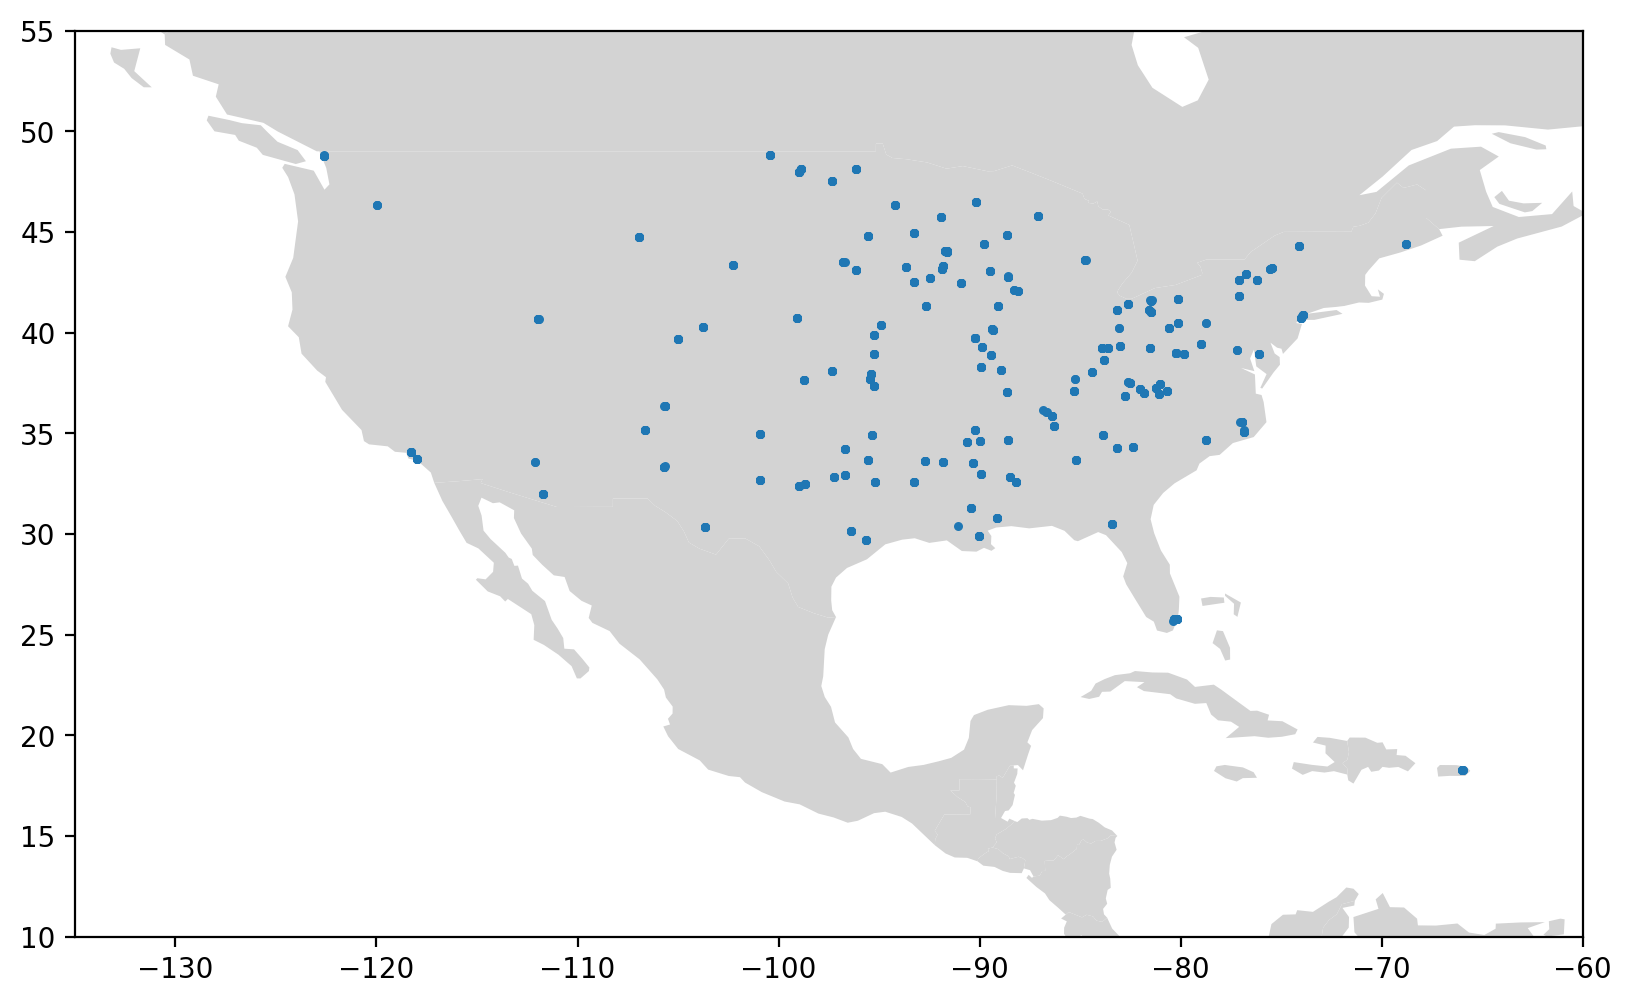

In [17]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(color="lightgrey", ax=ax)

plt.scatter(df["longitud"].astype(float),df["latitude"].astype(float), s=5)

plt.xlim([-135, -60])
plt.ylim([10, 55])

plt.savefig('test_visualisation.png')